### Distribution of Named Entities in Regular and Non-Regular Articles

In this notebook, we will look at the distribution of different named entities in regular and non-regular articles. We would primarily be looking at the number of mentions of that entity by the document length and draw a distribution for each entity for both the regular and non-regular articles. Below are the common named entities that are referenced:

**Different Types of Named Entities**

`PERSON`:	People, including fictional.

`NORP`:	Nationalities or religious or political groups.

`ORG`:	Companies, agencies, institutions, etc.

`LOCATION`:	mountain ranges, bodies of water, counter, cities, states, buildings, airports, highways, bridges, etc.

`PRODUCT`:	Objects, vehicles, foods, etc. (Not services.)

`EVENT`:	Named hurricanes, battles, wars, sports events, etc.

`WORK_OF_ART`:	Titles of books, songs, etc.

`LAW`:	Named documents made into laws.

`LANGUAGE`:	Any named language.

`DATE`:	Absolute or relative dates or periods.

`TIME`:	Times smaller than a day.

`PERCENT`:	Percentage, including ”%“.

`MONEY`:	Monetary values, including unit.

`QUANTITY`:	Measurements, as of weight or distance.

`ORDINAL`:	“first”, “second”, etc.

`CARDINAL`:	Numerals that do not fall under another type.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from tqdm import tqdm

In [2]:
#Reading the data
df = pd.read_csv('combined_data.csv')
df['label'] = df['label'].apply(lambda x: 'regular' if x == 'regular' or x == '0' else 'other')
df.head()

,source_name,url,created_date,tag,heading,author,article_text,label
0,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-06-29 00:00:00,"homes, construction, larkfield, estates, worke...",Larkfield\xe2\x80\x99s returning residents cop...,GUY KOVNER,\nHaley and Fletcher Skerrett loved suburban L...,regular
1,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-07-16 00:00:00,"hospital, fire, rosa, santa, tito, fires, jose...",'You felt more normal': St. Joseph Health empl...,MARTIN ESPINOZA,\nThere is little sign today of the smoke-lace...,regular
2,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-07-23 00:00:00,"sandy, sonoma, angie, center, luz, sisters, co...",Sonoma Valley sisters join forces to give fire...,DIANNE REBER HART,\nWhen the North Bay wildfires broke out in 20...,regular
3,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-07-03 00:00:00,"campus, teachers, hidden, students, valley, sa...",Santa Rosa teachers rebuild sense of safety on...,MATT VILLANO,\nThe rebuilding process has taken many forms ...,regular
4,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-07-01 00:00:00,"fire, montecito, heights, neighbors, flames, n...",\xe2\x80\x98I had to get it down\xe2\x80\x99: ...,CHRIS SMITH,\nWe\xe2\x80\x99ll never know if retired schoo...,regular


In [3]:
#Creating Sample
df_other = df[df.label=='other'].reset_index(drop=True)
df_regular = df[df.label=='regular'].sample(n=len(df[df.label=='other']), replace=False, random_state=0).reset_index(drop=True)
df_sample = df_other.append(df_regular).reset_index(drop=True)
df_sample = df_sample.sample(frac=1)

In [89]:
#Collecting Entities
regular_entities_all = {'PERSON': [], 'NORP': [], 'FAC': [], 'ORG': [], 'GPE': [], 'LOC': [],
                        'PRODUCT': [], 'EVENT': [], 'WORK_OF_ART': [], 'LAW': [], 'LANGUAGE': [],
                       'DATE': [], 'LANGUAGE': [], 'DATE': [], 'TIME': [], 'PERCENT': [], 'MONEY':[],
                       'QUANTITY': [], 'ORDINAL': [], 'CARDINAL': []}

op_entities_all = {'PERSON': [], 'NORP': [], 'FAC': [], 'ORG': [], 'GPE': [], 'LOC': [],
                        'PRODUCT': [], 'EVENT': [], 'WORK_OF_ART': [], 'LAW': [], 'LANGUAGE': [],
                       'DATE': [], 'LANGUAGE': [], 'DATE': [], 'TIME': [], 'PERCENT': [], 'MONEY':[],
                       'QUANTITY': [], 'ORDINAL': [], 'CARDINAL': []}

for i, row in tqdm(df_sample.iterrows()):
    nlp = spacy.load('en_core_web_sm')
    article = row['article_text']
    try:
        doc = nlp(article)
        regular_entities = {}
        op_entities = {}
        for entity in doc.ents:
            if row['label'] == 'regular':
                if entity.label_ not in regular_entities.keys():
                    regular_entities[entity.label_] = 1
                else:
                    regular_entities[entity.label_] +=1
            else:
                if entity.label_ not in op_entities.keys():
                    op_entities[entity.label_] = 1
                else:
                    op_entities[entity.label_] +=1

        for i in op_entities.keys():
            op_entities_all[i].append(op_entities[i]/len(doc))

        for i in regular_entities.keys():
            regular_entities_all[i].append(regular_entities[i]/len(doc))
    
    except:
        print(i)
        continue

53it [00:20,  2.40it/s]

236


88it [00:32,  3.20it/s]

5496


498it [03:02,  2.35it/s]

3112


1399it [08:21,  2.22it/s]

283


1452it [08:43,  2.24it/s]

278


2088it [13:01,  3.35it/s]

265


2210it [13:53,  2.65it/s]

248


2561it [16:17,  3.36it/s]

264


2874it [18:29,  3.12it/s]

256


3420it [22:07,  2.90it/s]

259


3469it [22:28,  2.98it/s]

234


3827it [24:44,  3.09it/s]

272


3857it [24:55,  3.14it/s]

230


3873it [25:01,  3.08it/s]

3489


3997it [25:46,  2.82it/s]

3040


4115it [26:29,  3.12it/s]

277


4715it [30:19,  3.01it/s]

3402


5168it [33:12,  2.79it/s]

253


5171it [33:14,  2.66it/s]

227


5238it [33:38,  3.31it/s]

271


5240it [33:38,  3.67it/s]

220


5617it [36:19,  3.02it/s]

260


5790it [37:32,  2.22it/s]


In [90]:
#Preparing DataFrame from the constructed dictionary
op_ent_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in op_entities_all.items() ]))
op_ent_df['LOCATION'] = op_ent_df['FAC'] + op_ent_df['GPE'] + op_ent_df['LOC']
op_ent_df = op_ent_df.drop(columns=['FAC', 'GPE', 'LOC'])

reg_ent_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in regular_entities_all.items() ]))
reg_ent_df['LOCATION'] = reg_ent_df['FAC'] + reg_ent_df['GPE'] + reg_ent_df['LOC']
reg_ent_df = reg_ent_df.drop(columns=['FAC', 'GPE', 'LOC'])

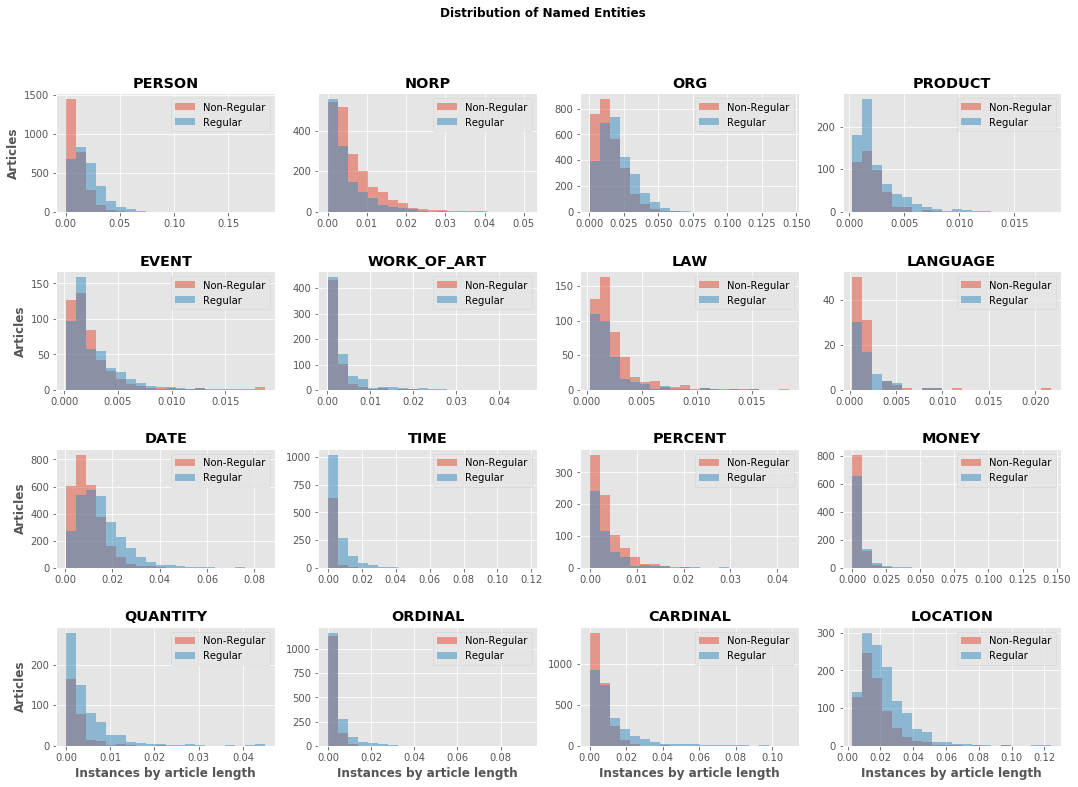

In [109]:
#Preparing the charts
fig, ax = plt.subplots(4,4, figsize=(18,12))
fig.suptitle('Distribution of Named Entities', fontweight='bold')
plt.subplots_adjust(hspace=0.5)
plt.style.use('ggplot')
entities = reg_ent_df.columns

for i in range(4):
    for j in range(4):
        bins = np.histogram(np.hstack((op_ent_df[entities[0]],
                                       reg_ent_df[entities[0]]))[~np.isnan(np.hstack((op_ent_df[entities[0]],
                                                                                      reg_ent_df[entities[0]])))], 
                            bins=20)[1] 
        _ = ax[i, j].hist(op_ent_df[entities[0]], alpha=0.5, bins = bins, label='Non-Regular')
        _ = ax[i, j].hist(reg_ent_df[entities[0]], alpha=0.5, bins = bins, label='Regular')
        _ = ax[i, j].set_title(entities[0], fontweight='bold')
        _ = ax[i, j].legend()
        
        entities = entities[1:]
    
_ = ax[3, 0].set_xlabel('Instances by article length', fontweight='bold')
_ = ax[3, 1].set_xlabel('Instances by article length', fontweight='bold')
_ = ax[3, 2].set_xlabel('Instances by article length', fontweight='bold')
_ = ax[3, 3].set_xlabel('Instances by article length', fontweight='bold')

_ = ax[0, 0].set_ylabel('Articles', fontweight='bold')
_ = ax[1, 0].set_ylabel('Articles', fontweight='bold')
_ = ax[2, 0].set_ylabel('Articles', fontweight='bold')
_ = ax[3, 0].set_ylabel('Articles', fontweight='bold')

**Observations**

As we can observe from the above charts, there is some striking differences in the distribution of named entities in the two classes:

* **Non-Regular Articles** have many more mentions of person names, languages and nationalities as compared to regular articles.
* **Regular Articles** on the other hand have much more mentions of locations, quantity, time and date.
* The distribution is heavily right-skewed for most of the entity types